In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

675
16


In [3]:
# data_file_path

In [5]:
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
df_train

,parameter,result
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0
...,...,...
670,1,1
671,1,1
672,1,1
673,1,1


In [6]:
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test

,parameter,result
0,2,1
1,3,1
2,4,1
3,1,1
4,1,1
5,4,1
6,2,0
7,3,1
8,2,1
9,4,1


In [9]:
#发作为1；未发作为0
y_train=[]
for i in range(df_train.shape[0]):
    if df_train.iloc[i,1]==1:
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in range(df_test.shape[0]):
    if df_test.iloc[i,1]==1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

675
325
16
15


In [12]:
#选择的通道数
channel_num=15
#训练集的SE切片长度
train_SE_len=16
#测试集的SE切片长度
test_SE_len=16

In [13]:
# 训练集
# 切成2s一段，不用乘通道数
y_long_data=[]
for i in y_train:
    for j in range((int)(train_SE_len/2)):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

5400


In [14]:
y_long_test_data=[]
for i in y_test:
    for j in range((int)(test_SE_len/2)):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

128


In [15]:
import scipy.signal
import scipy.io as scio   
#设定为2s一段
samps = 2

In [16]:
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_train.append(data_temp)   

Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220803

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220803(original).fif) does not conform

Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-严聪慧-20220805random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220831(jitter).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-严聪慧-20220805random_flip_5.fif) d

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220831(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220831(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-何晓丽-20220831(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-倪泽菁-20220826(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    1

Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220803(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(jitter).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-何晓丽-20220831(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-何晓丽-20220831(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-何晓丽-20220831(scale_down).fif) does not c

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220805(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-吴华丽-20220808(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    1

Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_6.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220805(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220805(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-吴华丽-20220805(scale_down).fif) does not c

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220831random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220905(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220905(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-唐心诚-20220905(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 .

Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_10.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-唐心诚-20220831random_flip_8.fif) d

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220819random_flip_16.fif...
Isotrak not found
    Range : 0 ..

Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_13.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220819random_flip_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220819random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220819random_flip_12.fif

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-张海峰-20220824random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.00

Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_17.fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220824random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220824random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-张海峰-20220824random_flip_16.fif

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-彭国芬-20220812random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220715(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220715(original).fif...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-彭国芬-20220812random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-彭国芬-20220812random_flip_19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-彭国芬-20220812random_flip_2.fif)

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220715(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220715(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220718(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220718(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220718(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-徐洋忠-20220718(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...   

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-李萌-20220819random_flip_1.fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220715(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220715(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-徐洋忠-20220715(scale_up).fif) does not

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-李萌-20220819random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-李萌-20220819random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-李萌-20220819random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-李萌-20220819random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-李萌-20220819random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-李萌-20220819random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ... 

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220722(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220722(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(flip).fif...
Isotrak not found


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-李萌-20220819random_flip_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-李萌-20220819random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-李萌-20220819random_flip_12.fif) d

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王云芝-20220725random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 s

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220725(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220725(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王云芝-20220725(scale_down).fif) does not c

Opening raw data file ../SE_train_processed\AV-王诗雯-20220727(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220727(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220729(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-王诗雯-20220729(jitter

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220711(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220727(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220727(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-王诗雯-20220727(original).fif) does not conform

Opening raw data file ../SE_train_processed\AV-董沁鑫-20220718(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220718(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220718(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220718(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220718(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220720(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\AV-董沁鑫-20220720(jitter

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-董沁鑫-20220718(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-董沁鑫-20220718(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2637413530.py:3: RuntimeWarning: This filename (../SE_train_processed\AV-董沁鑫-20220718(original).fif) does not conform

In [17]:
x_train=np.array(x_train)
x_train.shape

(5400, 15, 512)

In [18]:
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,test_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_test.append(data_temp)  

Opening raw data file ../SE_test_processed\AV-吴妍-20220817.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-吴妍-20220819.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-吴妍-20220822.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-吴妍-20220824.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220713.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220715.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\AV-张会-20220718.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.9

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-吴妍-20220817.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-吴妍-20220819.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2492\2441847617.py:3: RuntimeWarning: This filename (../SE_test_processed\AV-吴妍-20220822.fif) does not conform to MNE naming conventions. Al

In [19]:
x_test=np.array(x_test)
x_test.shape

(128, 15, 512)

In [20]:
# 引入刺激参数
ECT_code = []

for i in range(df_train.shape[0]):
    if df_train.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_train.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_train.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_train.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#不再乘通道
long_ECT_code = [i for i in ECT_code for k in range((int)(train_SE_len/2))]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(5400, 2)

In [21]:
# 引入刺激参数
test_ECT_code = []

for i in range(df_test.shape[0]):
    if df_test.iloc[i,0] == 1:
        test_ECT_code.append([0,0])
    if df_test.iloc[i,0] == 2:
        test_ECT_code.append([0,1])
    if df_test.iloc[i,0] == 3:
        test_ECT_code.append([1,0])
    if df_test.iloc[i,0] == 4:
        test_ECT_code.append([1,1])

test_ECT_code = np.array(test_ECT_code)
#改成了15通道
long_ECT_code_test = [i for i in test_ECT_code for k in range((int)(test_SE_len/2))]
long_ECT_code_test = np.array(long_ECT_code_test)
long_ECT_code_test.shape

(128, 2)

In [22]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print(x_train.shape,x_test.shape)

(5400, 15, 512, 1) (128, 15, 512, 1)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [24]:
# input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
# input2=tf.keras.layers.Input(shape=(2,))#刺激参数

# conv1=tf.keras.layers.Conv2D(64,(5,5),padding='same',activation='relu')(input1)
# pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv1)#64*256

# conv2=tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu')(pool1)
# pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv2)#32*128

# conv3=tf.keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(pool2)
# pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv3)#16*64

# flatten1=tf.keras.layers.Flatten()(pool3)

# dense1=tf.keras.layers.Dense(256,activation='relu')(flatten1)
# drop1=tf.keras.layers.Dropout(0.3)(dense1)
# dense2=tf.keras.layers.Dense(64,activation='relu')(drop1)
# drop2=tf.keras.layers.Dropout(0.1)(dense2)

# dense3=tf.keras.layers.Dense(20,activation='relu')(input2)
# dense4=tf.keras.layers.Dense(10,activation='relu')(dense3)

# concatenate1=tf.keras.layers.Concatenate()([drop2,dense4])

# dense5=tf.keras.layers.Dense(20,activation='relu')(concatenate1)
# # dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
# out=tf.keras.layers.Dense(1,activation='sigmoid')(dense5)

# # model=tf.keras.models.Model(inputs=input1,outputs=out)
# model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [25]:
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu')(input1)
norm1=tf.keras.layers.BatchNormalization()(conv1)
pool1=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm1)#64*256
drop1=tf.keras.layers.Dropout(0.1)(pool1)

conv2=tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(drop1)
norm2=tf.keras.layers.BatchNormalization()(conv2)
pool2=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm2)#32*128
drop2=tf.keras.layers.Dropout(0.2)(pool2)

conv3=tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(drop2)
norm3=tf.keras.layers.BatchNormalization()(conv3)
pool3=tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(norm3)#16*64
drop3=tf.keras.layers.Dropout(0.3)(pool3)

flatten1=tf.keras.layers.Flatten()(drop3)

dense1=tf.keras.layers.Dense(128,activation='relu')(flatten1)
drop4=tf.keras.layers.Dropout(0.2)(dense1)

dense3=tf.keras.layers.Dense(32,activation='relu')(input2)
# dense4=tf.keras.layers.Dense(16,activation='relu')(dense3)

concatenate1=tf.keras.layers.Concatenate()([drop4,dense3])

dense5=tf.keras.layers.Dense(32,activation='relu')(concatenate1)
drop5=tf.keras.layers.Dropout(0.3)(dense5)
# dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(drop5)

# model=tf.keras.models.Model(inputs=input1,outputs=out)
model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 15, 512, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 15, 512, 32)  320         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 15, 512, 32)  128        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [27]:
tf.keras.utils.plot_model(model, to_file="../img/model.png",show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics=['accuracy']
#                        ,'Precision','Recall']
             )

E:\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
#方便命名模型
my_epochs=15
my_batch_size=128
my_validation_split=0.2
history = model.fit([x_train,long_ECT_code], y_train, 
                    batch_size = my_batch_size,
                    epochs = my_epochs,
                    verbose = 1,
                    validation_split = my_validation_split
                   )

Epoch 1/15
34/34 [==============================] - 15s 421ms/step - loss: 1.1412 - accuracy: 0.5593 - val_loss: 4.6169 - val_accuracy: 0.8889
Epoch 2/15
34/34 [==============================] - 15s 432ms/step - loss: 0.6941 - accuracy: 0.6199 - val_loss: 6.3337 - val_accuracy: 0.8889
Epoch 3/15
34/34 [==============================] - 14s 425ms/step - loss: 0.6693 - accuracy: 0.6273 - val_loss: 5.5319 - val_accuracy: 0.8889
Epoch 4/15
34/34 [==============================] - 14s 421ms/step - loss: 0.6365 - accuracy: 0.6421 - val_loss: 3.5339 - val_accuracy: 0.8889
Epoch 5/15
34/34 [==============================] - 14s 418ms/step - loss: 0.5887 - accuracy: 0.7002 - val_loss: 0.6019 - val_accuracy: 0.6935
Epoch 6/15
34/34 [==============================] - 15s 427ms/step - loss: 0.4630 - accuracy: 0.7884 - val_loss: 0.6516 - val_accuracy: 0.8222
Epoch 7/15
34/34 [==============================] - 15s 435ms/step - loss: 0.3171 - accuracy: 0.8662 - val_loss: 0.4279 - val_accuracy: 0.8889

In [30]:
train_result = model.evaluate([x_train,long_ECT_code],y_train)

169/169 [==============================] - 11s 64ms/step - loss: 0.7780 - accuracy: 0.7978


In [31]:
x_test=np.array(x_test)
y_test=np.array(y_test)
long_ECT_code_test = np.array(long_ECT_code_test)
test_result = model.evaluate([x_test,long_ECT_code_test],y_test)

4/4 [==============================] - 0s 65ms/step - loss: 0.4189 - accuracy: 0.9219


In [32]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
# precision=history.history['precision']
# val_precision=history.history['val_precision']
# recall=history.history['recall']
# val_recall=history.history['val_recall']
# f1=[]
# for i in range(len(precision)):
#     f1.append(2*precision[i]*recall[i]/(precision[i]+recall[i]))
# val_f1=[]
# for i in range(len(val_precision)):
#     val_f1.append(2*val_precision[i]*val_recall[i]/(val_precision[i]+val_recall[i]))
epochs = range(1, len(acc) + 1)

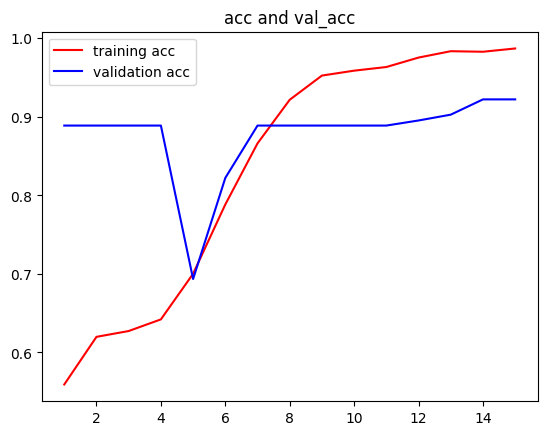

In [33]:
import matplotlib.pyplot as plt
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.legend()#显示左上角的图例
plt.savefig("../img/Accuracy_ECT_16S.jpg")
plt.show()

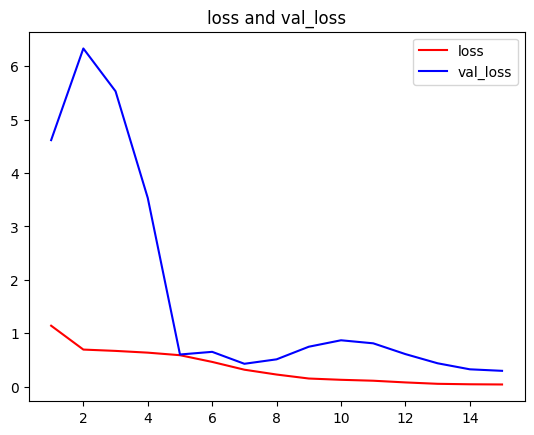

In [34]:
plt.title('loss and val_loss')
plt.plot(epochs, loss, 'red', label='loss')
plt.plot(epochs, val_loss, 'blue', label='val_loss')
plt.legend()
plt.savefig("../img/Loss_ECT_16S.jpg")
plt.show()

In [30]:
model.save('../model_save/'+model.name + "_ECT+16s_"+str(my_batch_size) + '_'+str(my_epochs)+'_'+str(my_validation_split)
           +'_'+str(test_result[1])[:8] + "_.h5")

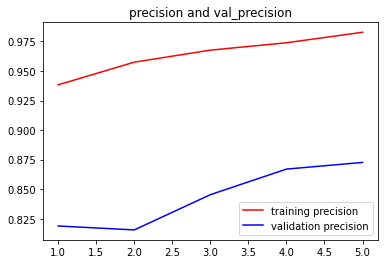

In [53]:
# plt.title('precision and val_precision')
# plt.plot(epochs, precision, 'red', label='training precision')
# plt.plot(epochs, val_precision, 'blue', label='validation precision')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Precision_ECT_16S.jpg")
# plt.show()

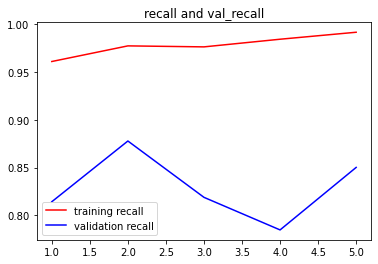

In [54]:
# plt.title('recall and val_recall')
# plt.plot(epochs, recall, 'red', label='training recall')
# plt.plot(epochs, val_recall, 'blue', label='validation recall')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/Recall_ECT_16S.jpg")
# plt.show()

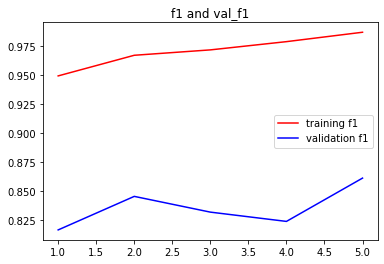

In [55]:
# plt.title('f1 and val_f1')
# plt.plot(epochs, f1, 'red', label='training f1')
# plt.plot(epochs, val_f1, 'blue', label='validation f1')
# plt.legend()#显示左上角的图例
# plt.savefig("../img/F1_ECT_16S.jpg")
# plt.show()

In [31]:
# loaded_model = tf.keras.models.load_model('../model_save/model_1_ECT+16s_40_0.7524510025978088_.h5')

In [32]:
# loss_,acc_ = loaded_model.evaluate([x_test,long_ECT_code_test],y_test)

In [33]:
# loss_,acc_ = loaded_model.evaluate([x_train,long_ECT_code],y_train)